In [1]:
from amftrack.pipeline.development.high_mag_videos.kymo_class import *
import os
import imageio.v2 as imageio
import matplotlib.pyplot as plt
import cv2
%matplotlib widget
%load_ext autoreload
%autoreload 2
from amftrack.pipeline.functions.image_processing.extract_graph import (
    from_sparse_to_graph,
    generate_nx_graph,
    clean_degree_4,
)
import scipy


F:\AMOLF_Projects\amftrack\util\dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


Kymos file created, address is at G:/AMOLF_Data/Plate_videos/20221109_Plate462_04_kymos
Using image selection 0 to -1
Succesfully extracted the skeleton. Did you know there is a skeleton inside inside you right now?

 To work with individual edges, here is a list of their indices:
edge 0, (4, 0)
edge 1, (4, 1)
edge 2, (5, 4)


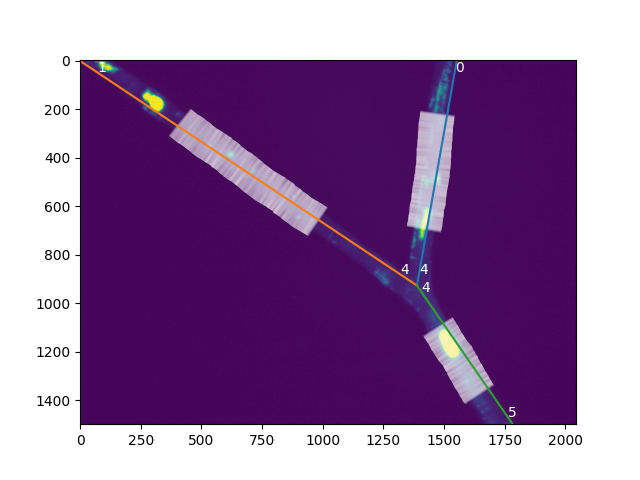

Just saved an image, sir!


In [2]:
img_address = 'G:/AMOLF_Data/Plate_videos/20221109_Plate462_04'

test_video = Kymo_video_analysis(img_address, logging=True)
edge_list = test_video.edges

print('\n To work with individual edges, here is a list of their indices:')
for i, edge in enumerate(edge_list):
    print('edge {}, {}'.format(i, edge))
    
test_video.plot_extraction_img(save_img=True)
edge_objs = test_video.edge_objects

In [3]:
bin_nr = 2
bins = np.linspace(0, 1, bin_nr+1)
kymo = [edge_objs[1].extract_kymo(bounds=(bins[i], bins[i+1])) for i in range(bin_nr)]


100%|██████████| 600/600 [00:51<00:00, 11.75it/s]


Saved the array
Saved the image


100%|██████████| 600/600 [00:06<00:00, 99.15it/s] 


Saved the array
Saved the image


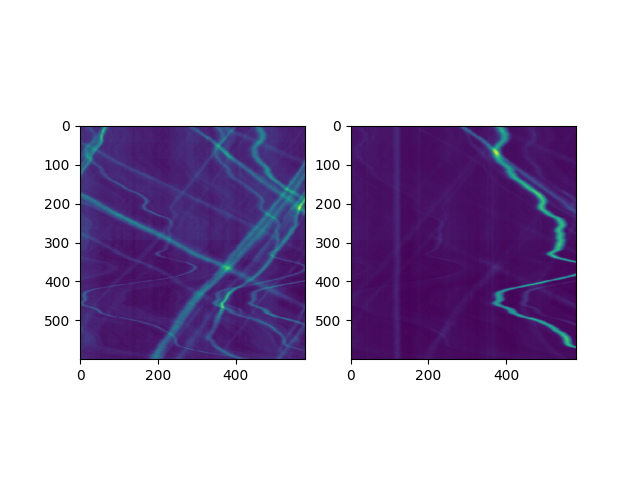

In [4]:
fig, ax = plt.subplots(1, bin_nr)
count = 0
for i in range(bin_nr):
    ax[i].imshow(kymo[i])
plt.show()

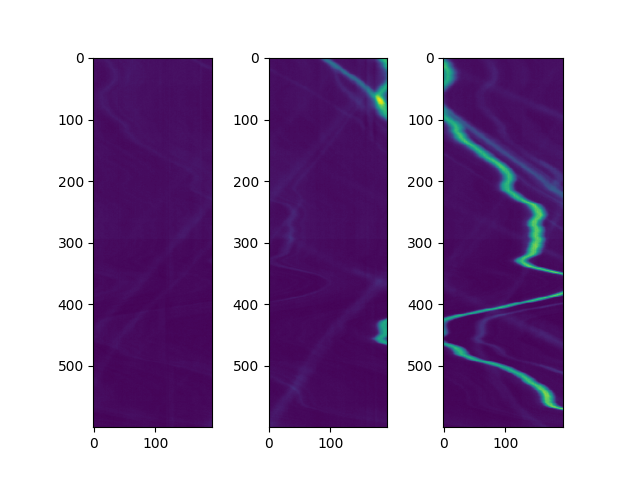

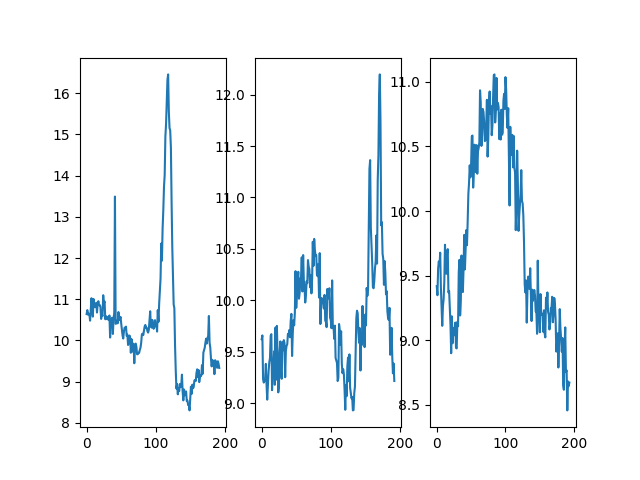

In [11]:
bins = 3
bins_space = np.linspace(0, len(kymo[0][0]), bins+1, dtype=int)
fig, ax = plt.subplots(1, bins)
fig2, ax2 = plt.subplots(1, bins)
kymo_means = np.percentile(kymo[1], .4, axis=0)
kymo_normal = kymo[1] / kymo_means
kymo_min, kymo_max = (np.min(kymo_normal), np.max(kymo_normal))
for i in range(bins):
    ax[i].plot(kymo_means[bins_space[i]:bins_space[i+1]])
    ax2[i].imshow(kymo_normal.transpose()[bins_space[i]:bins_space[i+1]].transpose(), vmin=kymo_min, vmax = kymo_max)
plt.show()

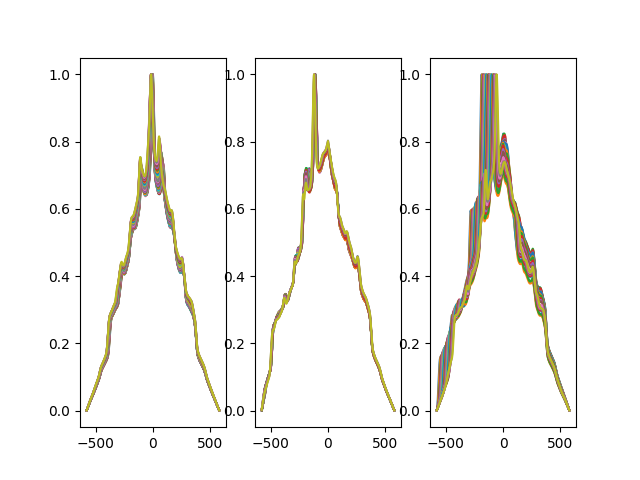

In [6]:

fig, ax = plt.subplots(1, bins)
for i in range(1, 30):
    for j in range(bins):
        corr = signal.correlate(kymo[1][0], kymo[1][bins_space[j]:bins_space[j+1]][i])
        corr /= np.max(corr)
        lags = signal.correlation_lags(len(kymo[0][0]), len(kymo[0][bins_space[j]:bins_space[j+1]][i]))
        ax[j].plot(lags, corr)
plt.show()